### WPM ratios

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from hol.wpm_ratios import WPMRatios

year1 = 1750
year2 = 1920

ratios = WPMRatios(year1, year2)

### Linear regressions

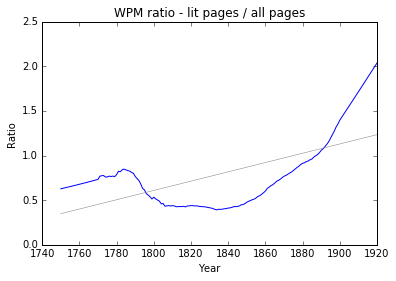

5.77236157145e-16


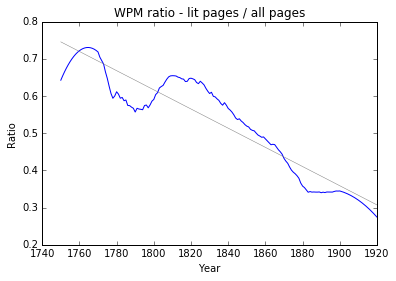

1.2744413483e-34


In [2]:
def plot_linreg(token):

    series = ratios.series_smooth(token)

    reg = ratios.lin_reg(token)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    r1 = list(series.values())[0]
    r2 = list(series.values())[-1]

    y1 = (reg.slope * x1) + reg.intercept
    y2 = (reg.slope * x2) + reg.intercept

    plt.title('WPM ratio - lit pages / all pages')
    plt.xlabel('Year')
    plt.ylabel('Ratio')
    plt.plot(*zip(*series.items()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

    print(reg.pvalue)
    
plot_linreg('jesus')
plot_linreg('court')

### Token -> slope, p<0.01

In [7]:
import math

def print_ratios(tokens, cols=5):
    
    # Get row count and figure size.
    rows = math.ceil(len(tokens) / cols)
    figsize = (cols*2, rows*2)
    
    # Make the figure + axes.
    fig, axarr = plt.subplots(rows, cols, figsize=figsize)
    fig.tight_layout(pad=0, h_pad=2, w_pad=0.1)
    
    for i, token in enumerate(tokens):
        
        ax = axarr[math.floor(i/cols)][i%cols]
        ax.set_title(token)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
        ax.tick_params(labelsize=8)
        ax.set_xlim(year1, year2)
        
        s = ratios.ratios[token]
        
        ax.plot(
            *zip(*s.items()),
            linestyle='none',
            marker='.',
            markersize=2,
        )

### Decreasing

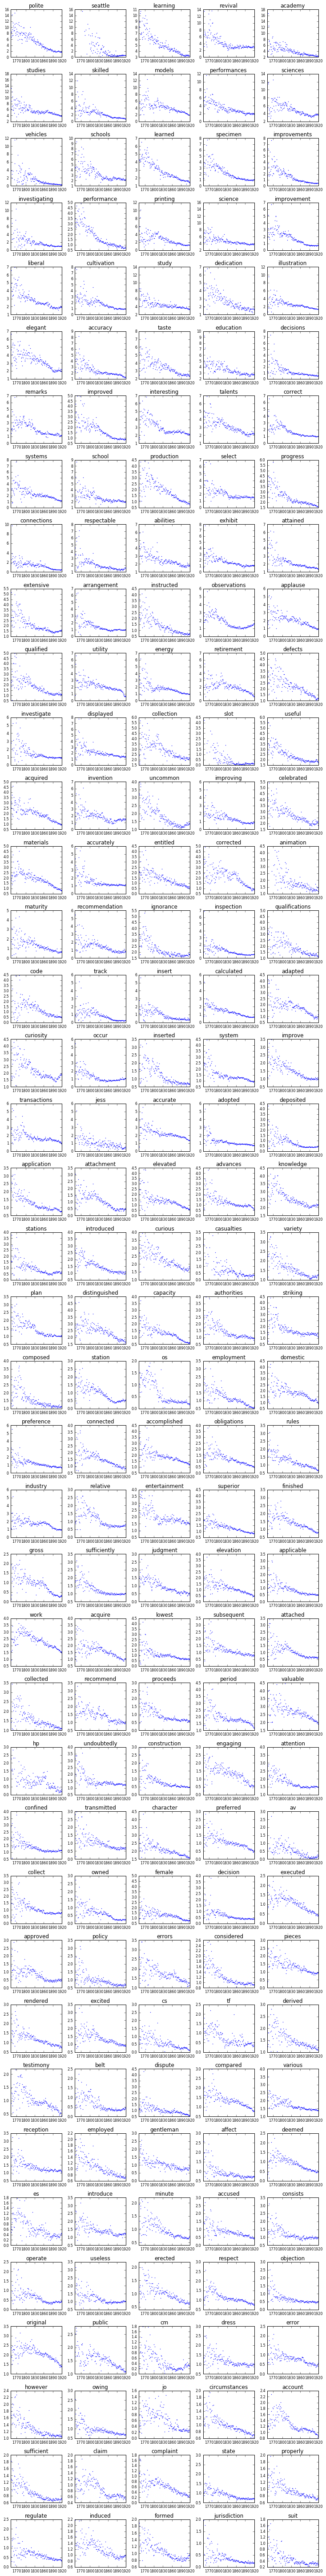

In [4]:
from scipy.stats import linregress

from hol.utils import sort_dict

def score(series):
    
    x = list(series.keys())
    y = list(series.values())
    reg = linregress(x, y)
    
    if reg.pvalue < 1e-20:
        return -reg.slope
    
result = ratios.query(score)

print_ratios(list(result.keys())[:200])

### Increasing

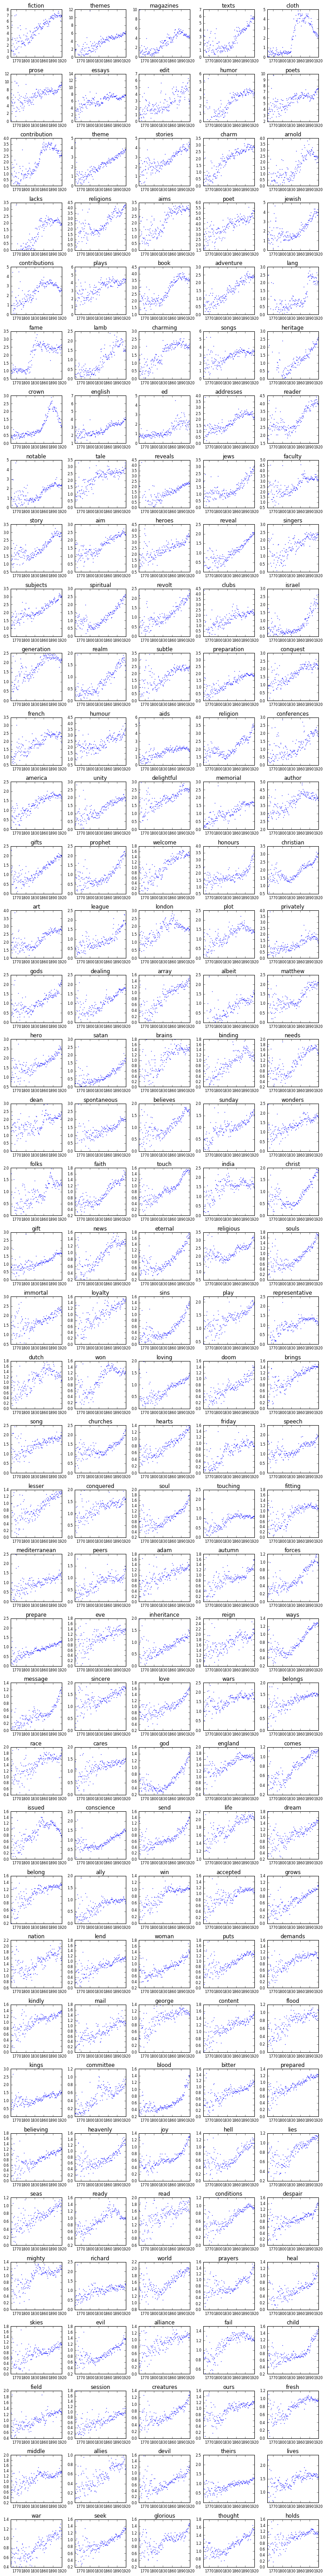

In [5]:
def score(series):
    
    x = list(series.keys())
    y = list(series.values())
    reg = linregress(x, y)
    
    if reg.pvalue < 1e-20:
        return reg.slope
    
result = ratios.query(score)

print_ratios(list(result.keys())[:200])

### Weighted KDEs

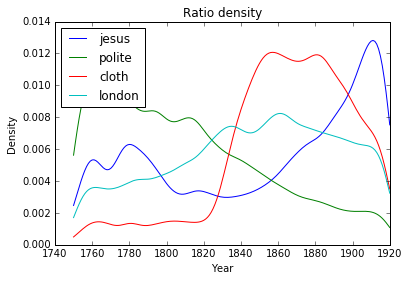

In [12]:
def plot_pdfs(tokens, legend=True):
    for t in tokens:
        
        samples = ratios.pdf(t)
        
        plt.title('Ratio density')
        plt.xlabel('Year')
        plt.ylabel('Density')
        plt.plot(*zip(*samples.items()), label=t)
        
        if legend:
            plt.legend(loc='upper left')
        
    plt.show()

plot_pdfs(['jesus', 'polite', 'cloth', 'london'])